In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random

import statsmodels.api as sm 
import pickle

In [2]:
## blocks

In [3]:
pwd!

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full'

In [4]:
dict_blocks = '/home/tbellagio/HapFM/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [20]:
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/lfmm_fullresults_all_k/'
pvalues_files = [i for i in os.listdir(wd) if 'wo_calibration_pvalue_full_genome' in i]

In [21]:
pvalues_files

['wo_calibration_pvalue_full_genome_bio3_k25.csv',
 'wo_calibration_pvalue_full_genome_bio7_k25.csv',
 'wo_calibration_pvalue_full_genome_bio19_k25.csv',
 'wo_calibration_pvalue_full_genome_bio11_k25.csv',
 'wo_calibration_pvalue_full_genome_bio15_k25.csv',
 'wo_calibration_pvalue_full_genome_bio2_k25.csv',
 'wo_calibration_pvalue_full_genome_bio6_k25.csv',
 'wo_calibration_pvalue_full_genome_bio10_k25.csv',
 'wo_calibration_pvalue_full_genome_bio14_k25.csv',
 'wo_calibration_pvalue_full_genome_bio18_k25.csv',
 'wo_calibration_pvalue_full_genome_bio8_k25.csv',
 'wo_calibration_pvalue_full_genome_bio4_k25.csv',
 'wo_calibration_pvalue_full_genome_bio12_k25.csv',
 'wo_calibration_pvalue_full_genome_bio16_k25.csv',
 'wo_calibration_pvalue_full_genome_bio1_k25.csv',
 'wo_calibration_pvalue_full_genome_bio5_k25.csv',
 'wo_calibration_pvalue_full_genome_bio9_k25.csv',
 'wo_calibration_pvalue_full_genome_bio13_k25.csv',
 'wo_calibration_pvalue_full_genome_bio17_k25.csv']

In [5]:
dict_snps = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/var_pos_grenenet.csv'
dict_snps = pd.read_csv(dict_snps)

In [6]:
dict_snps = dict_snps[dict_snps['total_alleles05filter_firstgen'].notna()].reset_index(drop=True)

In [24]:
## to create results files 
for pvalues_file in pvalues_files:
    kvalue = pvalues_file.split('_')[-1].replace('.csv', '')
    biovar = pvalues_file.split('_')[-2].replace('.csv', '')
    print(biovar)
    pvalues = dd.read_csv(wd + pvalues_file)
    pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)
    pvalues = pd.concat([dict_snps['id'],pvalues],axis=1)
    th = 0.05/len(pvalues)
    pvalues['significant'] = pvalues[biovar] <= th
    pvalues['block'] = pvalues['id'].map(reverse_mapping) #.fillna(df['values'])
    pvalues.columns = ['snp_id', 'p_value', 'significant', 'block']
    pvalues.to_csv(wd + f'lfmm_{biovar}_{kvalue}_results.csv',index=None)

bio3
bio7
bio19
bio11
bio15
bio2
bio6
bio10
bio14
bio18
bio8
bio4
bio12
bio16
bio1
bio5
bio9
bio13
bio17


In [29]:
pvalues

snp_id   p_value  significant   block
0             1_346  0.603204        False     1_0
1             1_353  0.054322        False     1_0
2             1_363  0.521669        False     1_0
3             1_395  0.159756        False     1_0
4             1_396  0.159756        False     1_0
...             ...       ...          ...     ...
1054569  5_26975078  0.506657        False  5_3110
1054570  5_26975121  0.564064        False  5_3110
1054571  5_26975148  0.564064        False  5_3110
1054572  5_26975272  0.238876        False  5_3110
1054573  5_26975288  0.092515        False  5_3110

[1054574 rows x 4 columns]

In [ ]:
for pvalues_file in pvalues_files:
    biovar = pvalues_file.split('_')[-1].replace('.csv', '')
    print(biovar)
    pvalues = dd.read_csv(wd + pvalues_file)
    pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)
    pvalues = pd.concat([dict_snps['id'],pvalues],axis=1)
    th = 0.05/len(pvalues)
    pvalues['significant'] = pvalues[biovar] < th
    pvalues['block'] = pvalues['id'].map(reverse_mapping) #.fillna(df['values'])
    sign_blocks = pvalues.groupby('block')[biovar].min().reset_index()
    sign_blocks.to_csv(f'sign_blocks_{biovar}.csv', index=None)
    print(len(sign_blocks))

In [25]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
biovars = clim_sites_during_exp.columns[1:]

In [78]:
### MANHATTAN PLOTS

In [26]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
biovars = clim_sites_during_exp.columns[1:]

In [27]:
dict_snps = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/var_pos_grenenet.csv'
dict_snps = pd.read_csv(dict_snps)

In [11]:
biovars = ['bio1', 'bio17']

In [28]:
biovars

Index(['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19'],
      dtype='object')

In [12]:
wd

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/lfmm_fullresults_all_k/'

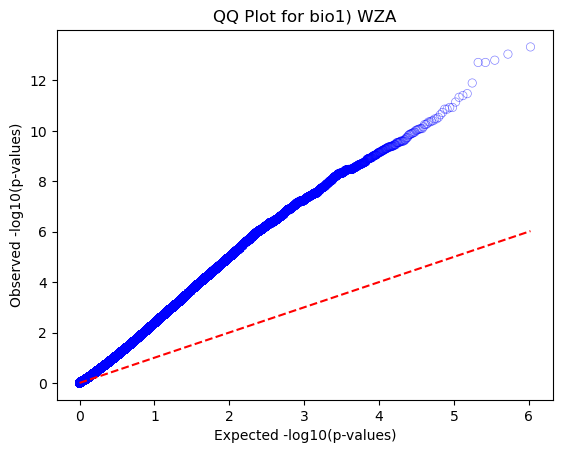

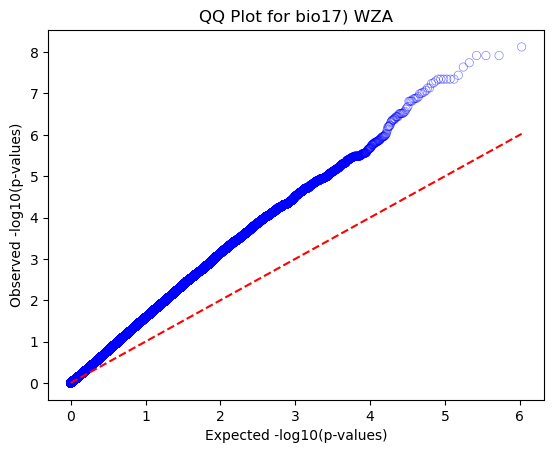

In [37]:
for biovar in biovars:
    pvalues_file = f'wo_calibration_pvalue_full_genome_{biovar}_k25.csv'
    pvalues = dd.read_csv(wd + pvalues_file)
    pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)
    pvalues.columns = ['pvalue']
    observed_quantiles = -np.log10(np.sort(pvalues['pvalue'].values))
    
    # Expected quantiles from the uniform distribution
    expected_quantiles = -np.log10(np.linspace(1 / len(pvalues), 1, len(pvalues)))
    
    # QQ plot
    sns.scatterplot(x = expected_quantiles, y = observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5)
    plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')
    
    plt.xlabel("Expected -log10(p-values)")
    plt.ylabel("Observed -log10(p-values)")
    plt.title(f'QQ Plot for lfmm {biovar}')
    
    plt.show()

In [ ]:
    # Run PLINK clumping
    plink \
    --bfile /carnegie/nobackup/scratch/tbellagio/gea_grene-net/jacknife_lfmm/clumping/grenenet_og \
    --clump /carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/input_clumping_bio9.txt
    --clump-p1 1.5453657571674064e-08 \
    --clump-r2 0.2 \
    --clump-kb 250 \
    --out /carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/output/output_clumping_bio9.clumped

In [7]:
kvalue = 'k25'

In [10]:
biovar = 'bio18'
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/lfmm_fullresults_all_k/'


In [14]:
pvalues_file = wd + f'lfmm_{biovar}_{kvalue}_results.csv'
lfmm = pd.read_csv(pvalues_file)

In [16]:
lfmm = lfmm.sort_values('p_value').head(100)

In [17]:
import pickle
dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [18]:
lfmm['block'] = lfmm['snp_id'].map(reverse_mapping)

In [19]:
lfmm = lfmm.drop_duplicates('block')

In [22]:
lfmm.to_csv(f'top_hits_lfmm_first_gen_{biovar}.csv')

In [22]:
binomf['block'].unique()

array(['5_3036', '2_664', '1_5116', '4_2320', '5_604', '5_602', '5_648',
       '5_571', '5_447', '5_2402', '5_730', '4_2042', '5_335', '1_4155',
       '5_630', '5_3006', '1_4940', '4_3002'], dtype=object)

In [14]:
biovar='bio1'

In [15]:
pvalues_file = f'wo_calibration_pvalue_full_genome_{biovar}.csv'

In [47]:
input_clumping = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/input_clumping_bio9.txt',sep='\s+')

In [50]:
input_clumping[input_clumping['SNP'] == '4_8003037']

SNP         P
2231462  4_8003037  0.000459

In [39]:
pvalues = dd.read_csv(wd + pvalues_file)
pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)

In [45]:
pvalues

bio9
0        0.013193
1        0.111958
2        0.106680
3        0.127010
4        0.920988
...           ...
3235475  0.736052
3235476  0.355897
3235477  0.511958
3235478  0.138595
3235479  0.904483

[3235480 rows x 1 columns]

In [39]:
    pvalues_file = wd + f'lfmm_{biovar}_{kvalue}_results.csv'
    
    pvalues = pd.read_csv(pvalues_file)

In [43]:
pvalues['chrom'] = pvalues['snp_id'].str.split('_').str[0]
pvalues['pos'] = pvalues['snp_id'].str.split('_').str[1]

In [47]:
pvalues

id  pos chrom maf05filter total_alleles05filter snp_id  \
0             1_291  346     1         NaN                   NaN  1_346   
1             1_346  353     1       1_346                 1_346  1_353   
2             1_349  363     1         NaN                   NaN  1_363   
3             1_352  395     1         NaN                   NaN  1_395   
4             1_353  396     1       1_353                 1_353  1_396   
...             ...  ...   ...         ...                   ...    ...   
3235475  5_26975208  NaN   NaN         NaN                   NaN    NaN   
3235476  5_26975215  NaN   NaN         NaN                   NaN    NaN   
3235477  5_26975267  NaN   NaN         NaN                   NaN    NaN   
3235478  5_26975272  NaN   NaN  5_26975272            5_26975272    NaN   
3235479  5_26975288  NaN   NaN  5_26975288            5_26975288    NaN   

          p_value significant block  
0        0.765751       False   1_0  
1        0.023993       False   1_0  
2        0.697004       False   1_0  
3        0.741758       False   1_0  
4        0.741758       False   1_0  
...           ...         ...   ...  
3235475       NaN         NaN   NaN  
3235476       NaN         NaN   NaN  
3235477       NaN         NaN   NaN  
3235478       NaN         NaN   NaN  
3235479       NaN         NaN   NaN  

[3235480 rows x 9 columns]

In [23]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full


In [21]:
blocks_deleted = ['1_2123', '1_2134', '1_5160', '2_1264', '2_1434', '2_1498',
       '2_576', '2_973', '3_518', '3_551', '4_234', '5_274', '5_3006',
       '5_331', '5_542', '5_602', '5_724', '5_775', '5_891', '5_918',
       '5_923']

In [36]:
to_mark = df[df['block'].isin(blocks_deleted)].drop_duplicates('block')['id'].values

In [15]:
to_mark = ['2_970', '2_1265', '4_2320']

In [16]:
kvalue='k25'

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


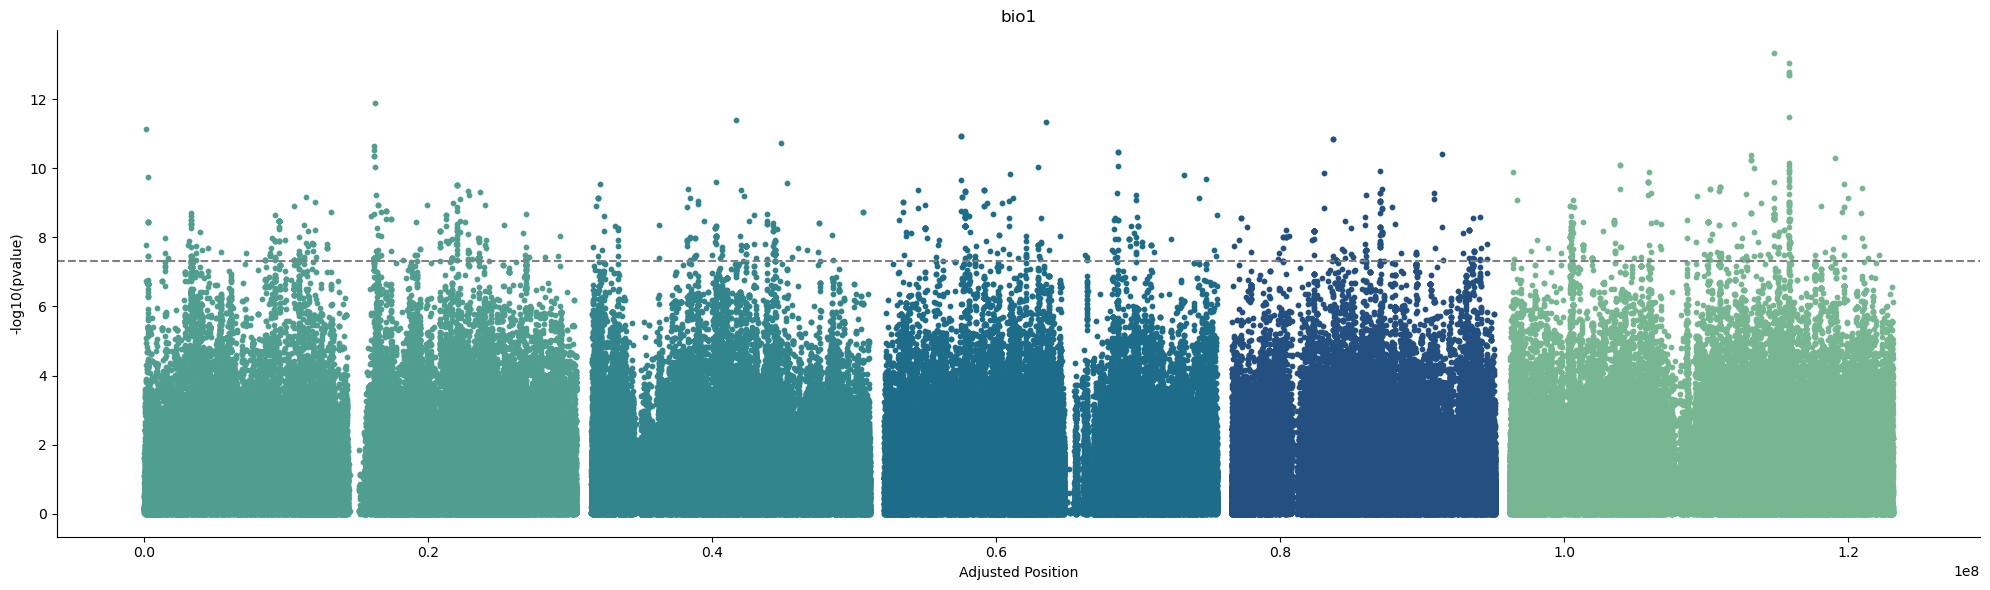

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


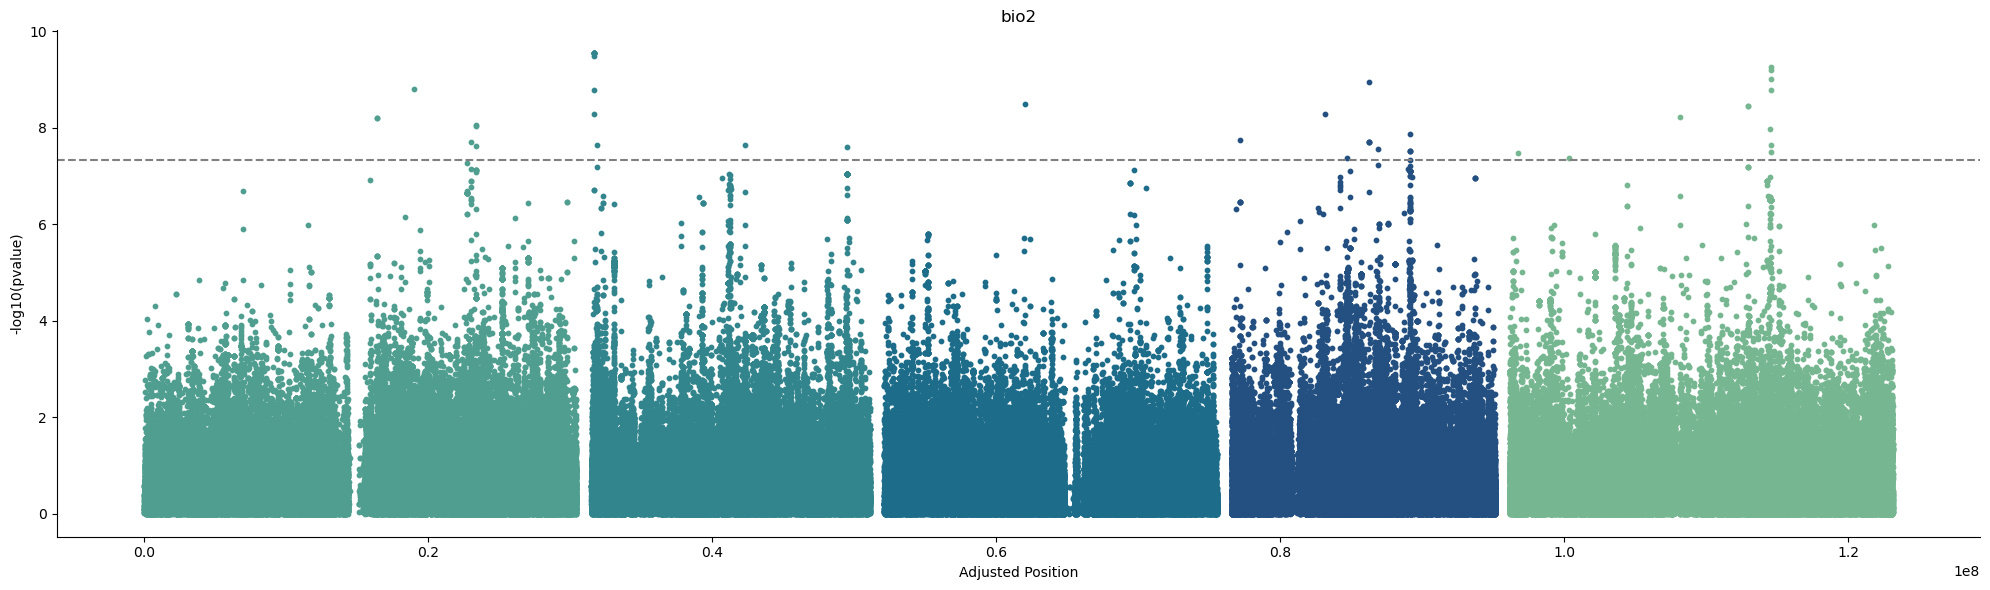

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


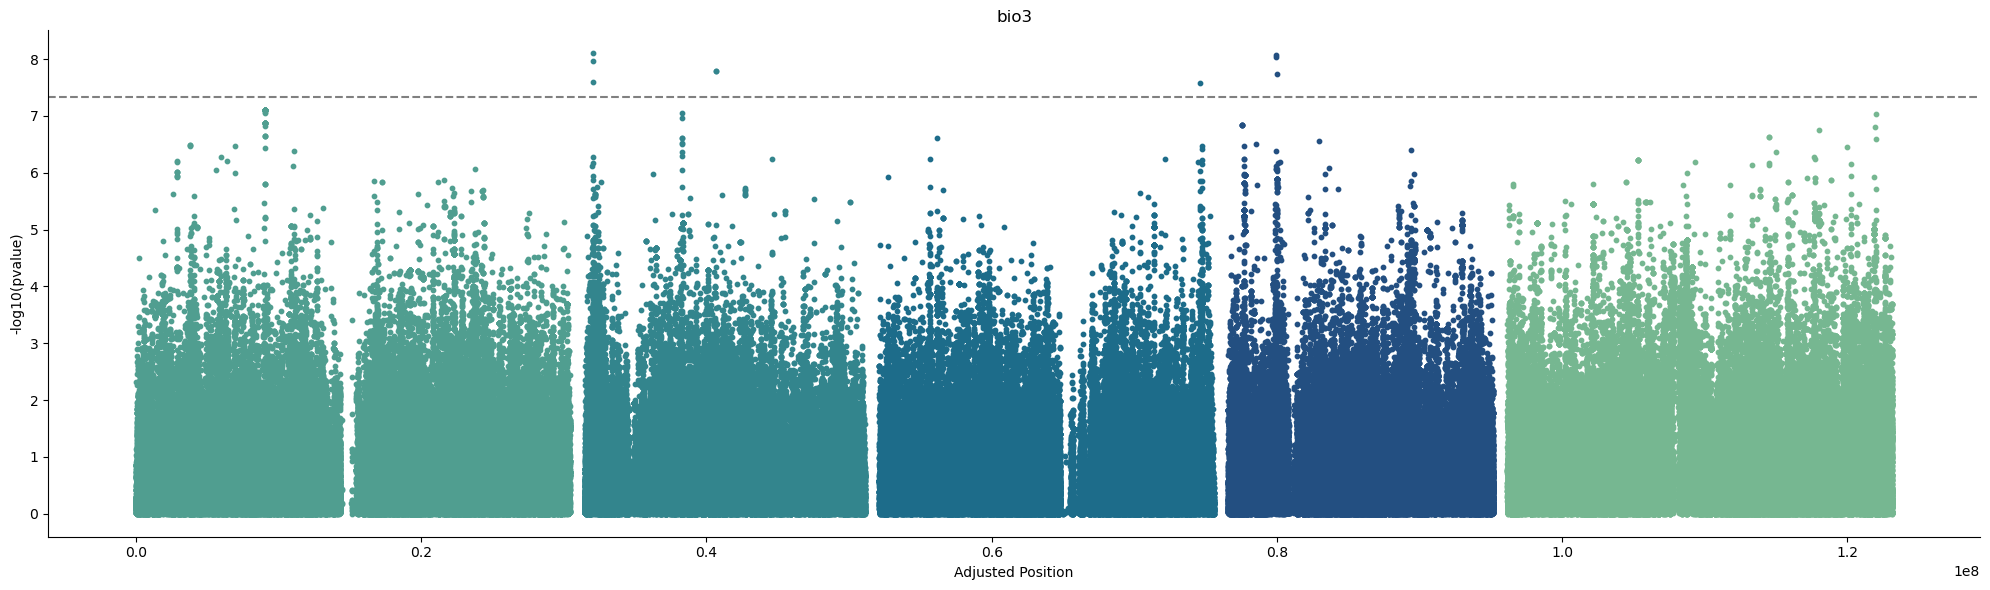

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


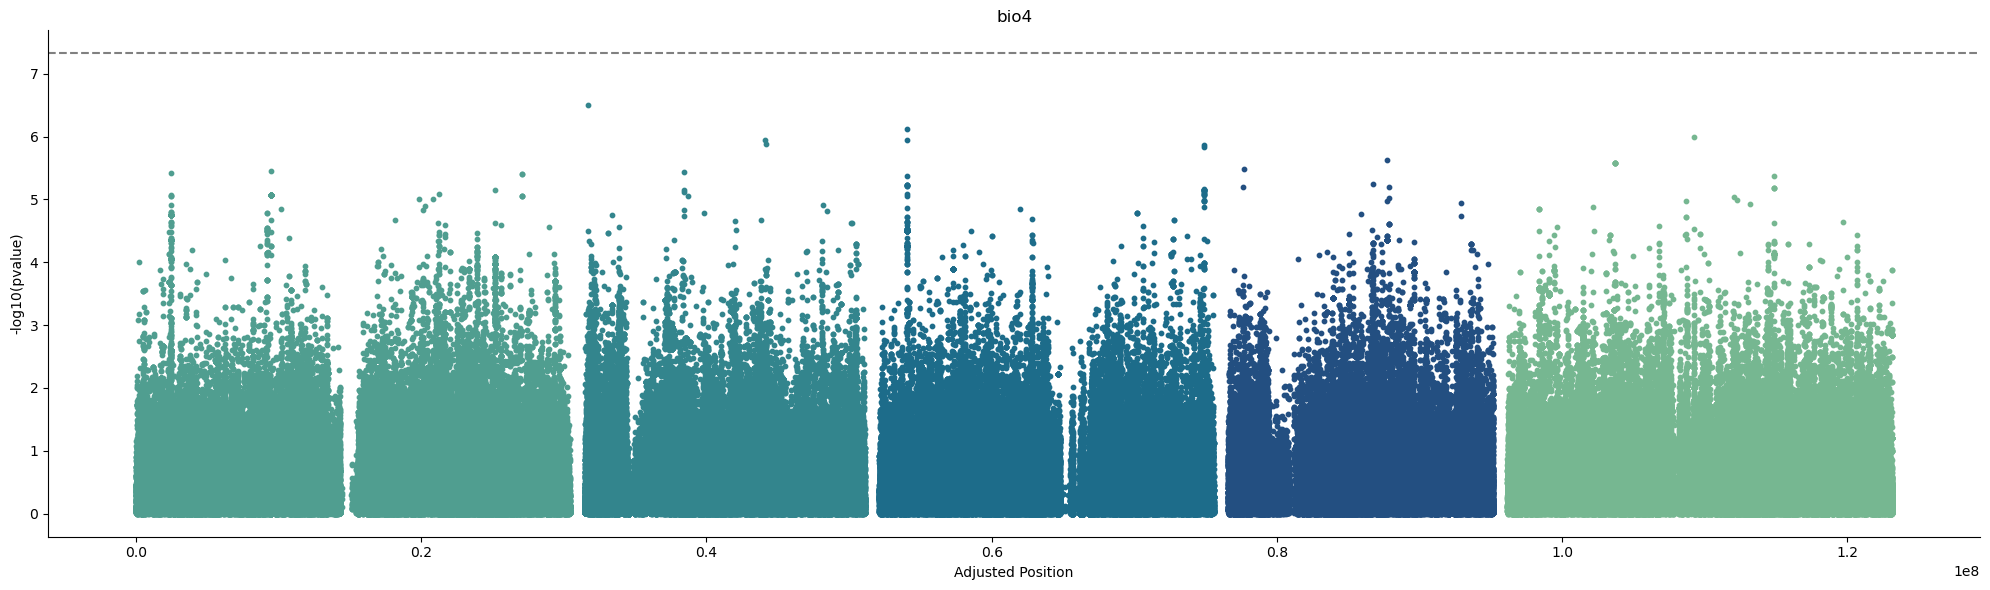

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


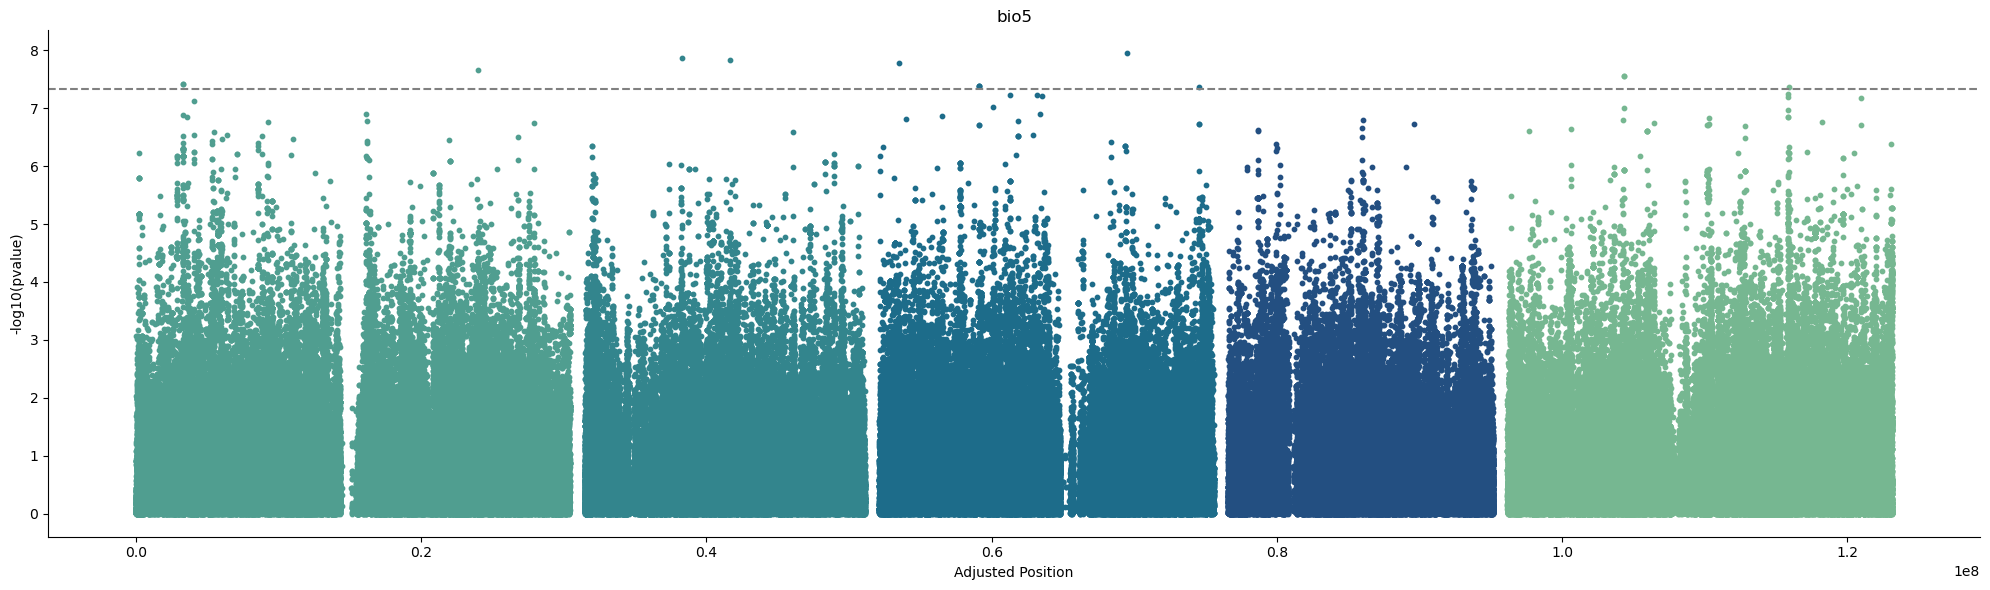

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


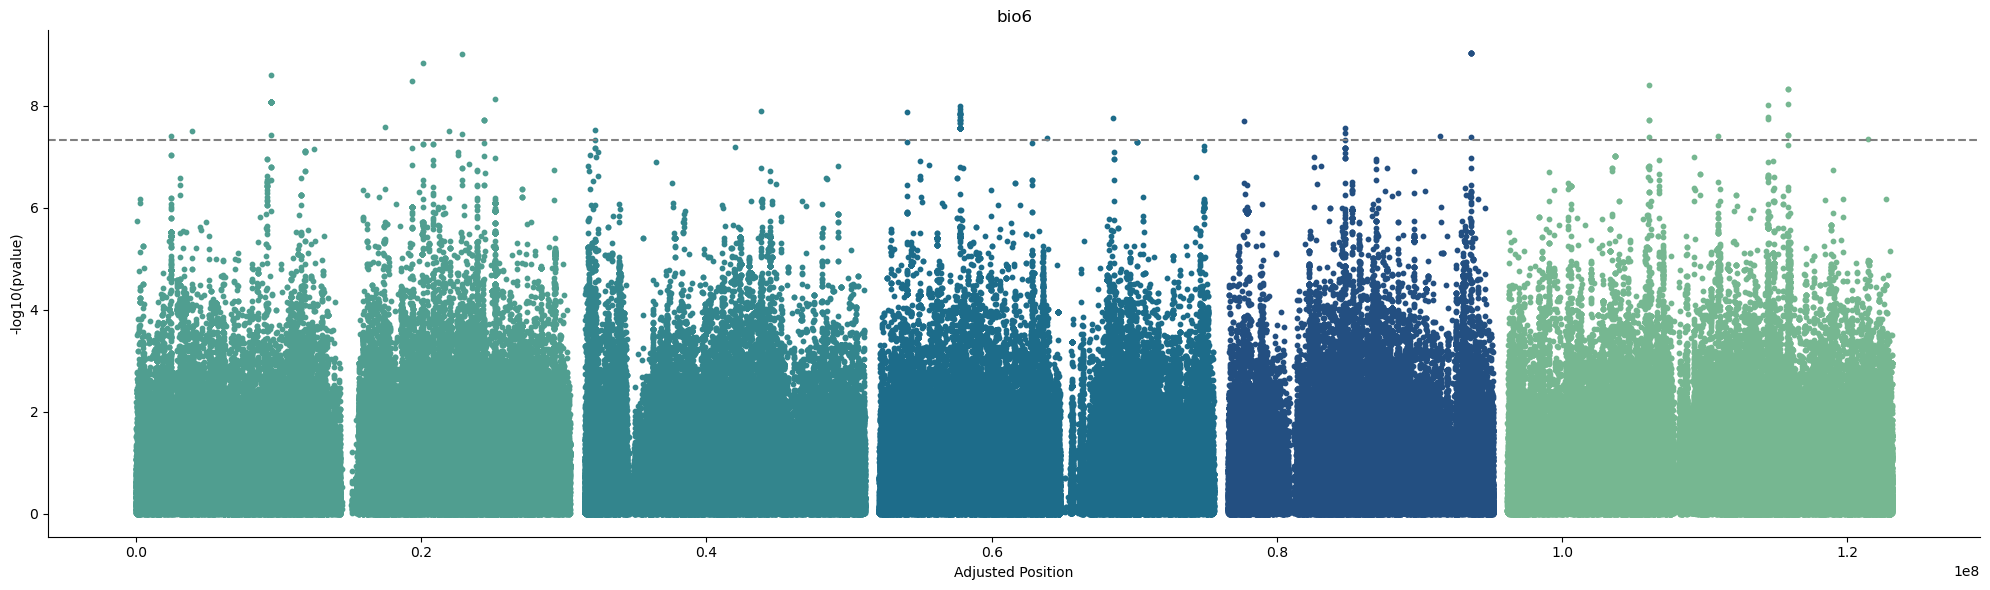

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


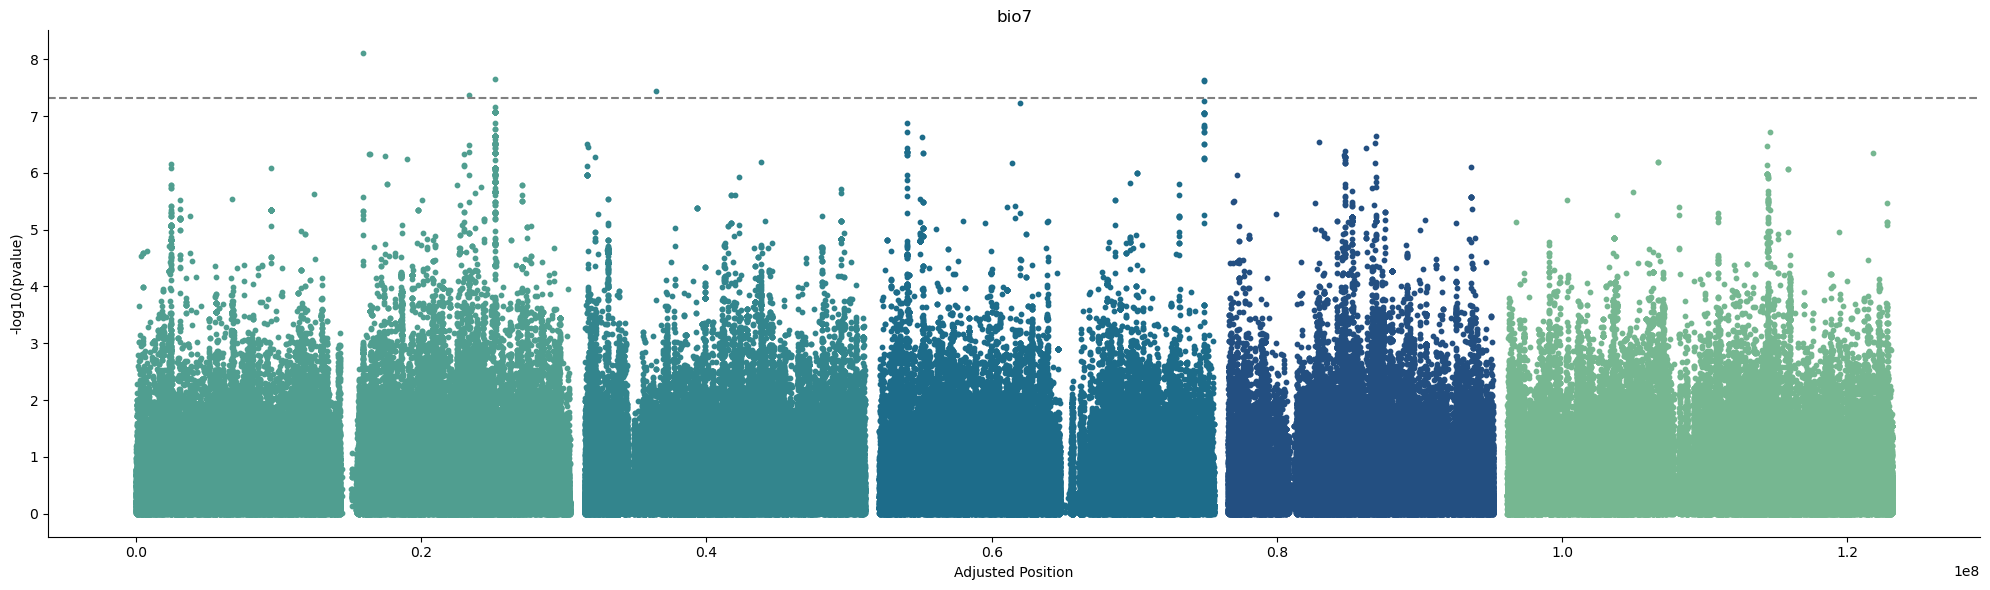

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


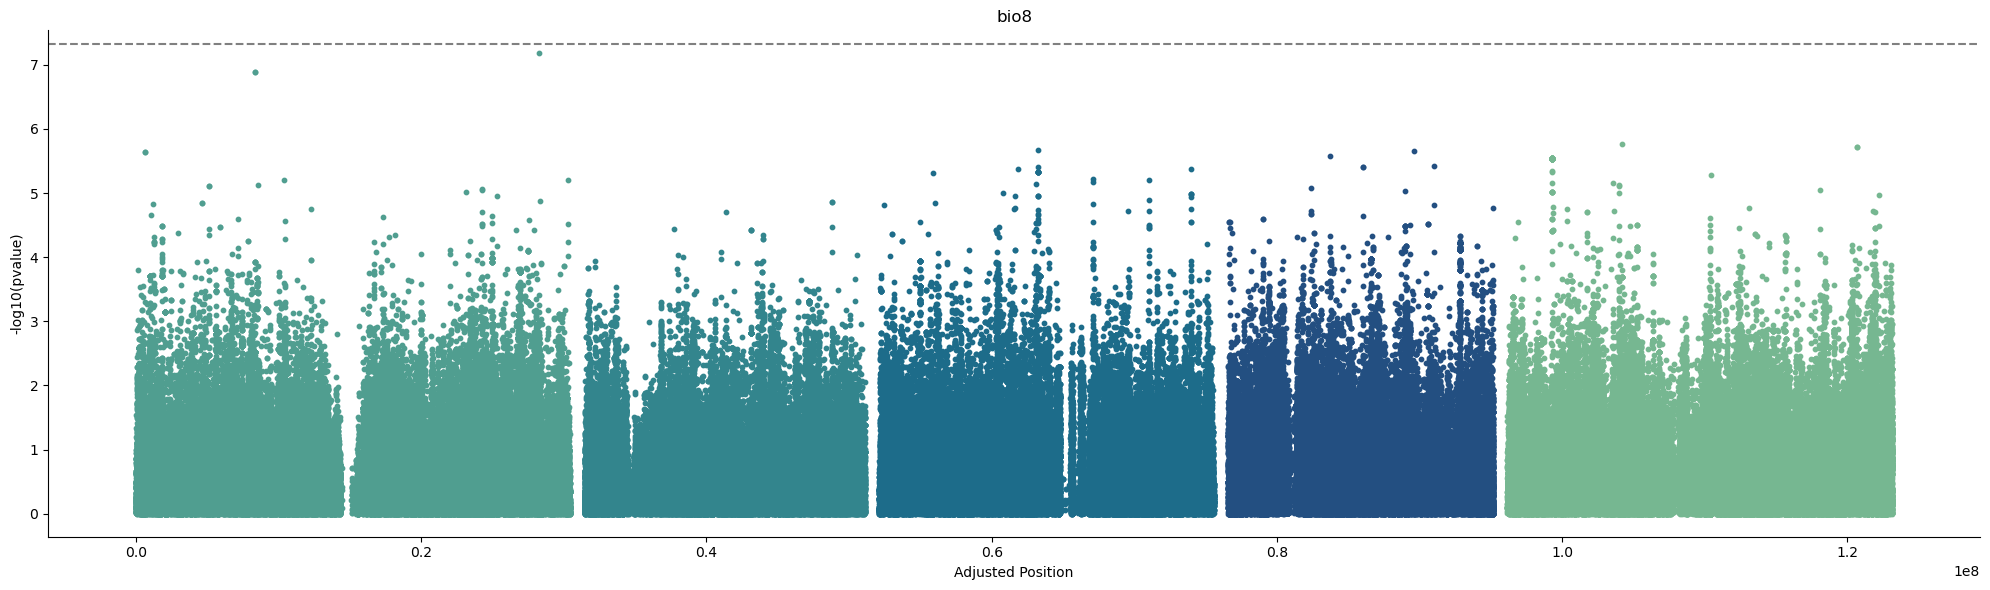

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


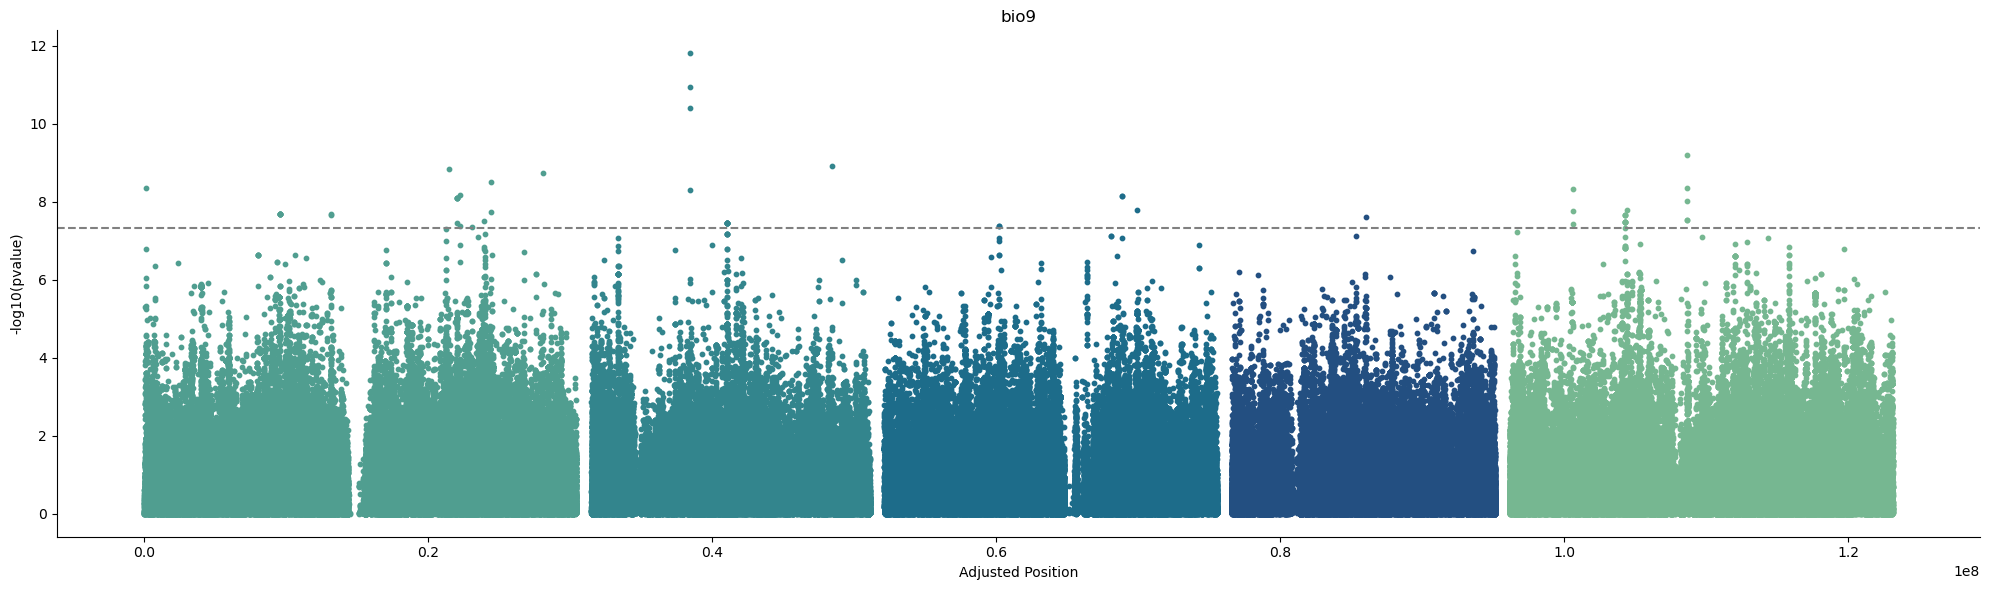

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


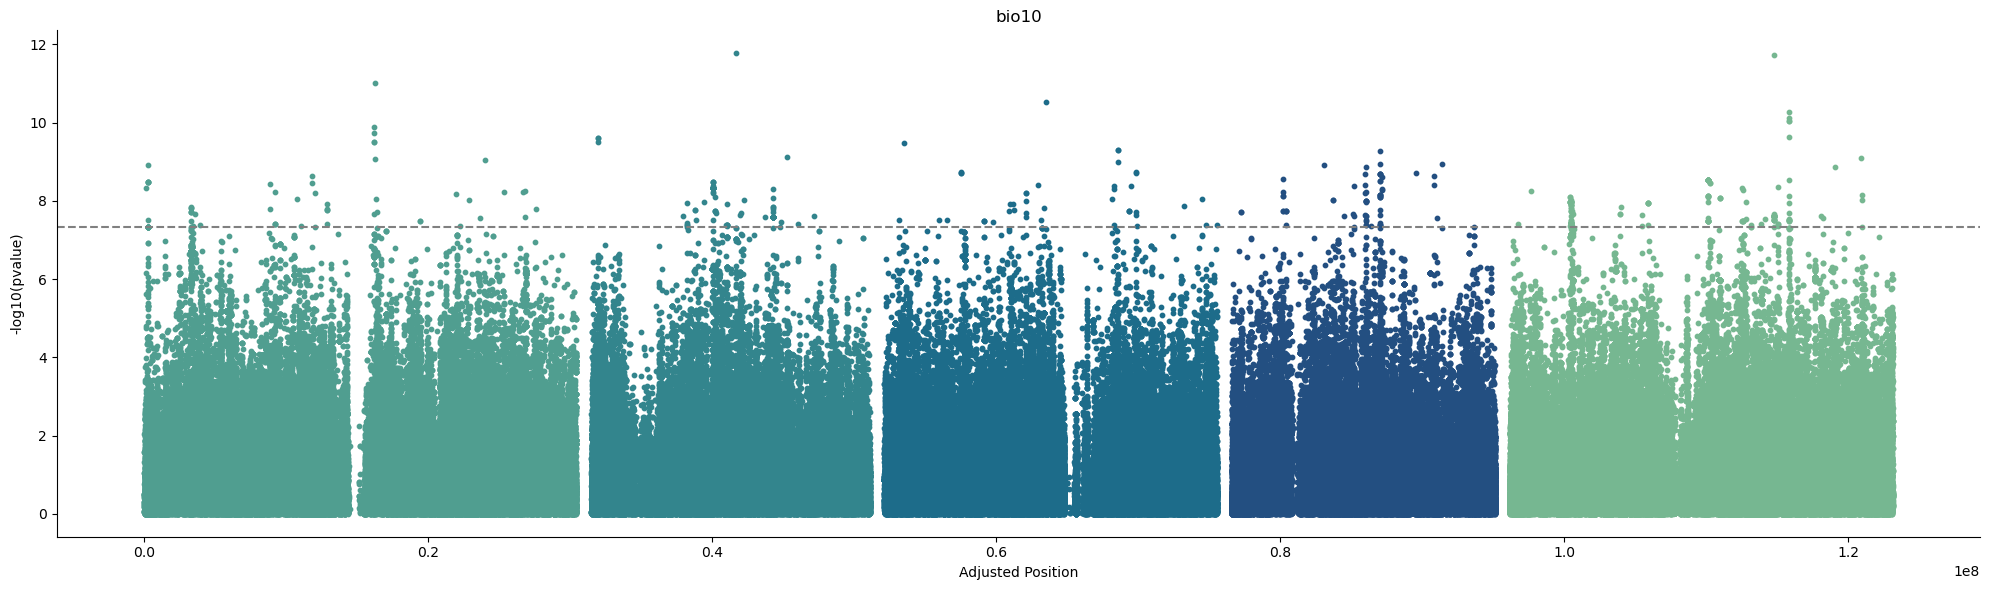

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


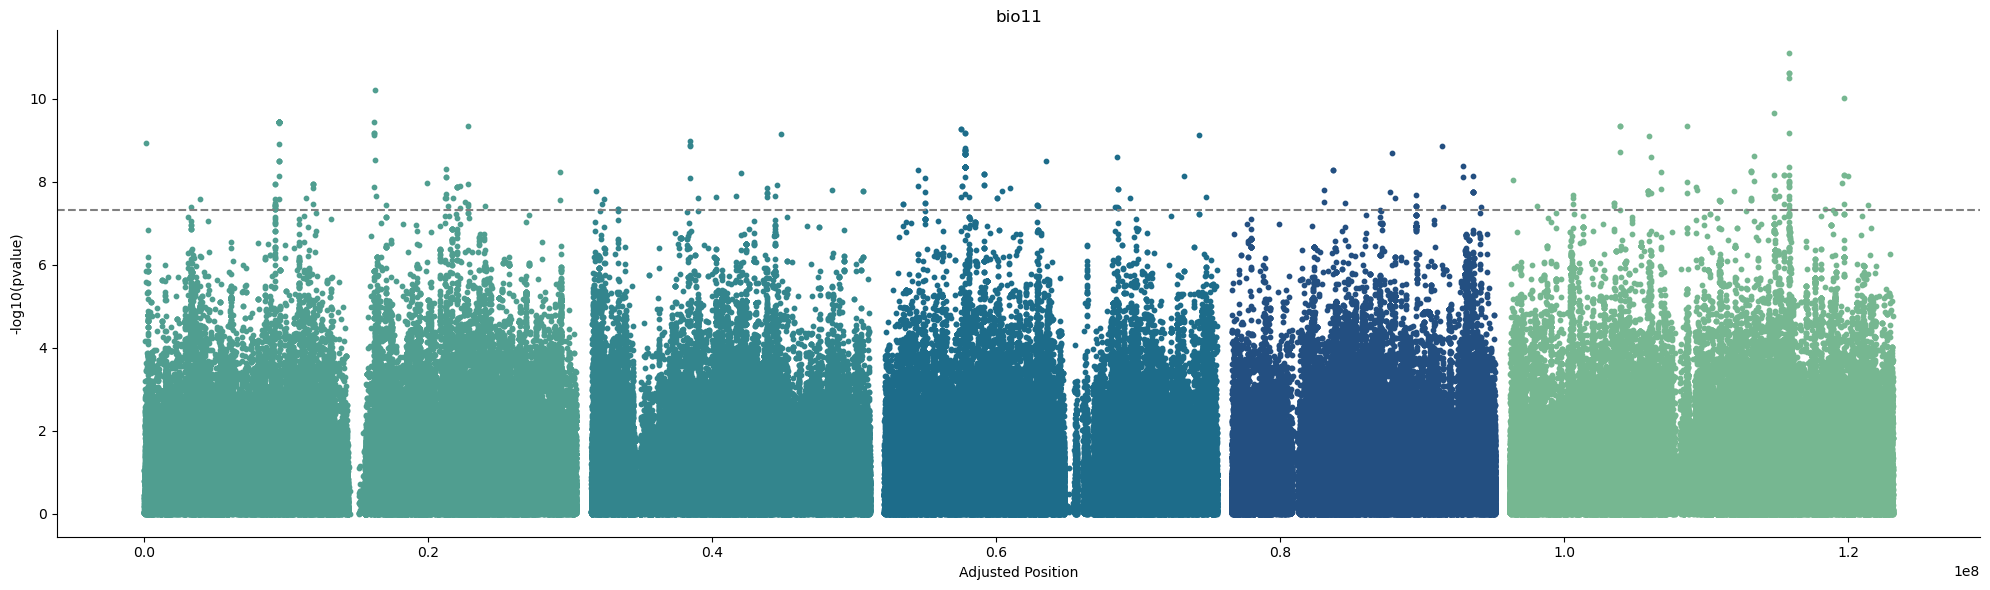

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


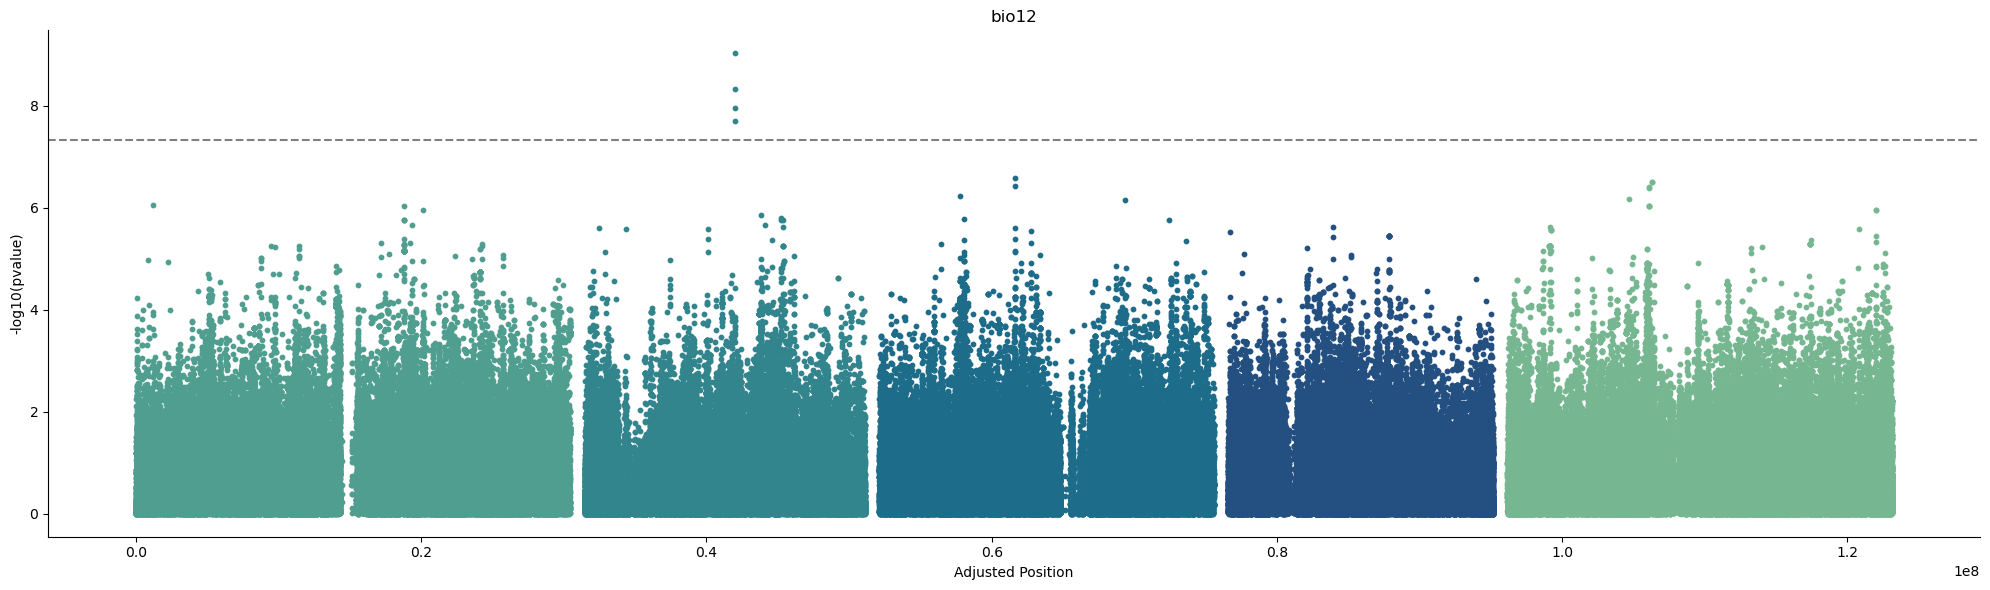

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


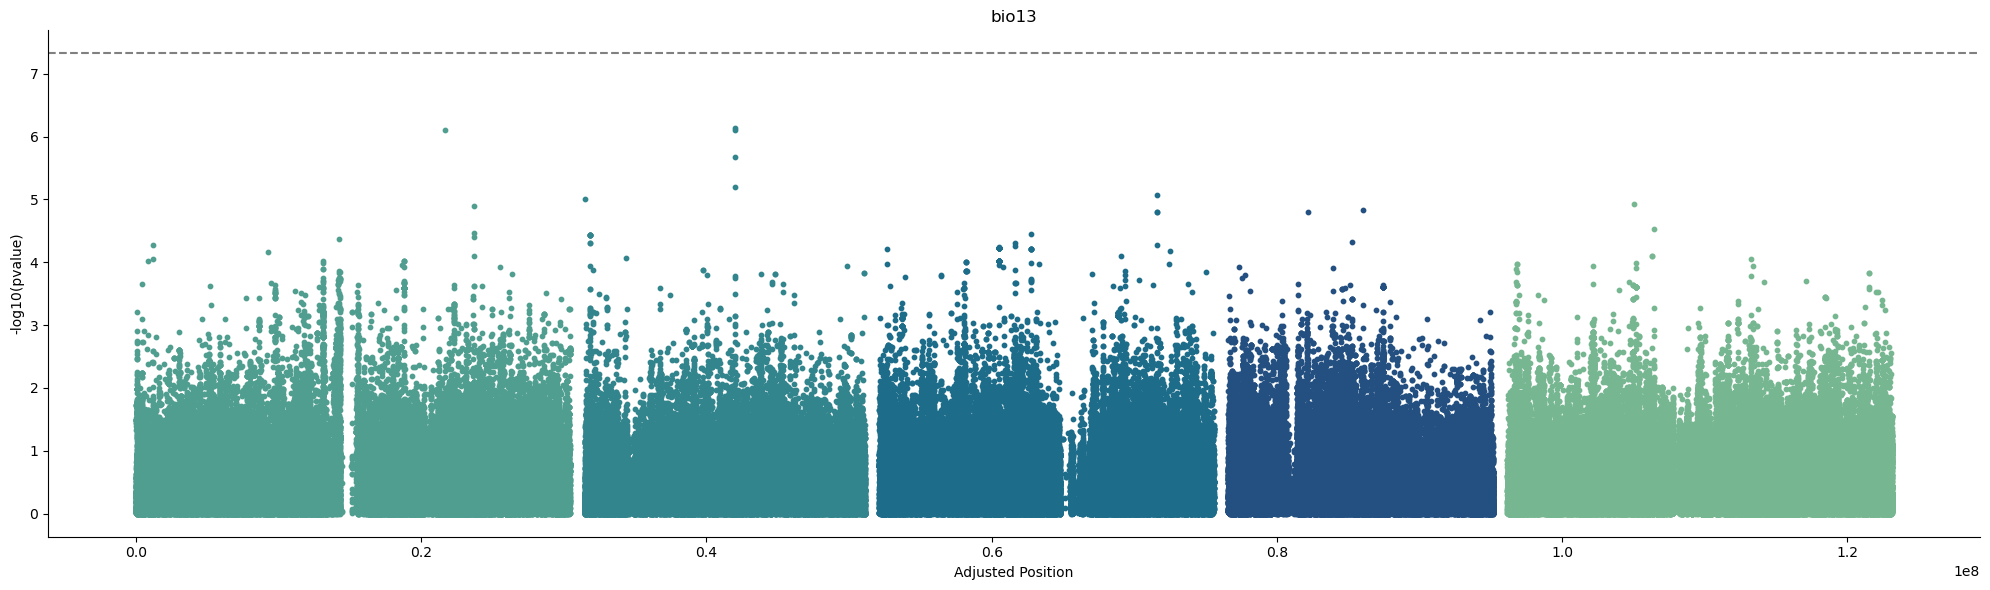

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


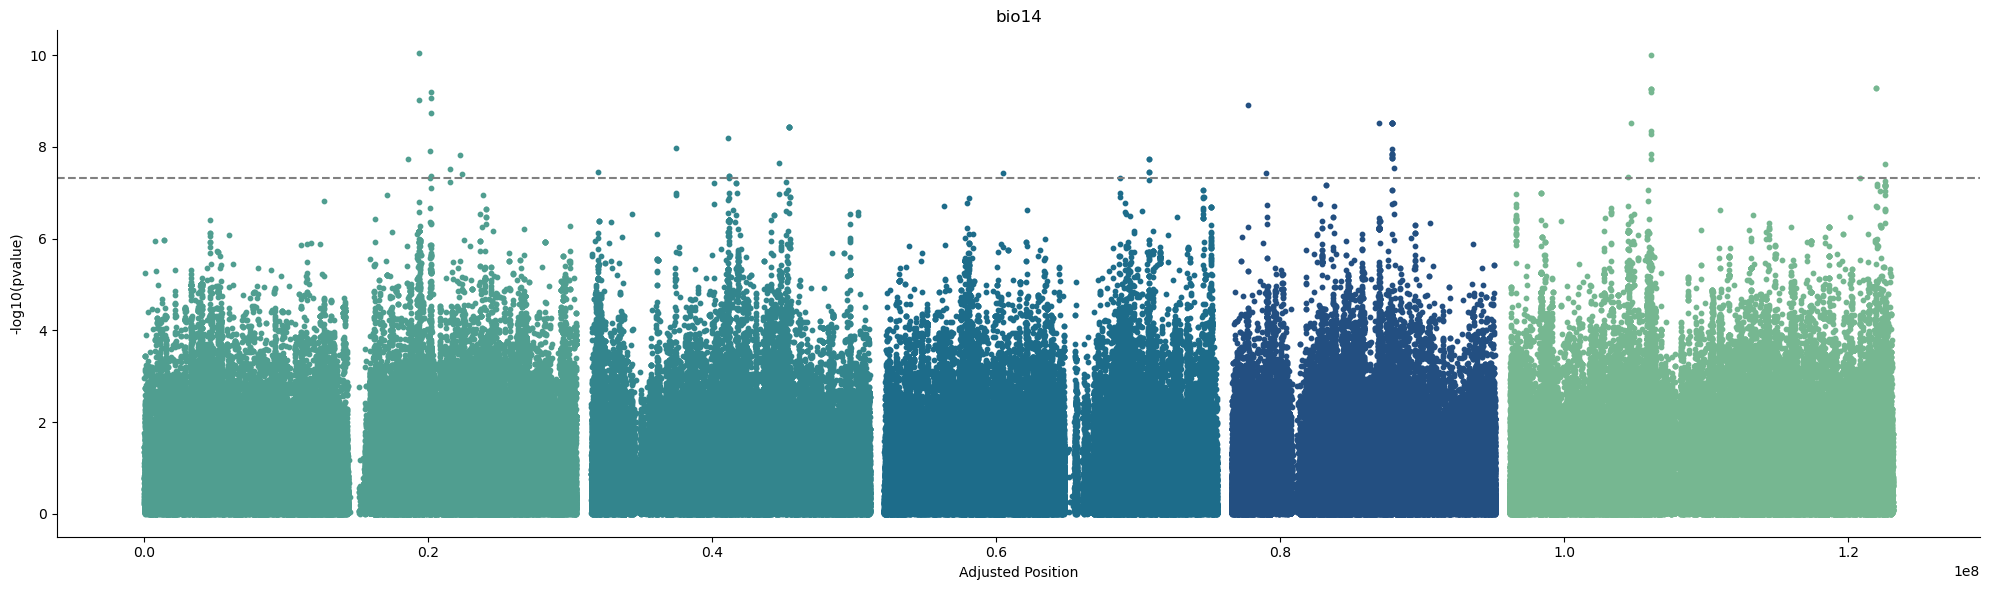

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


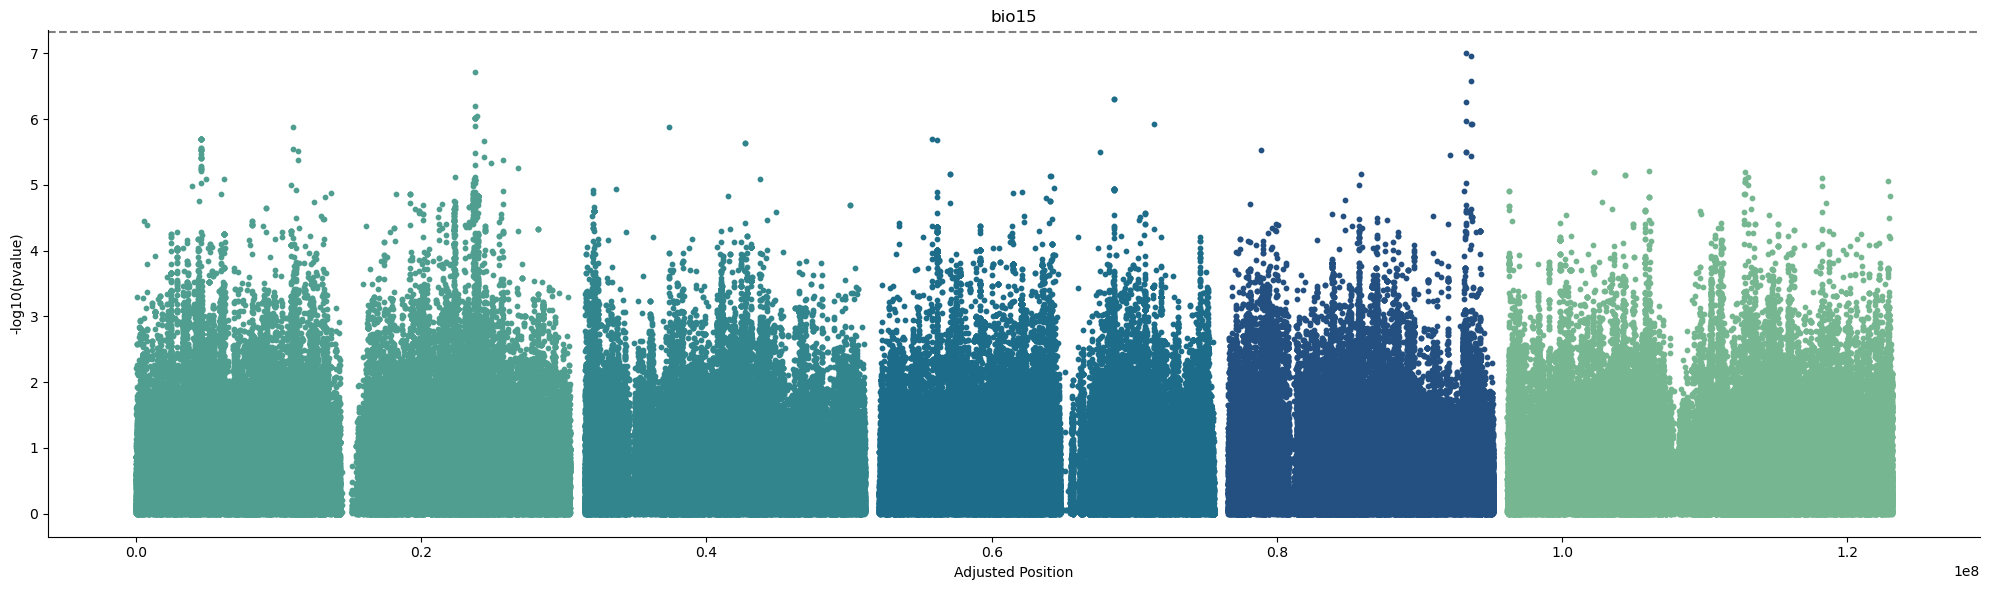

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


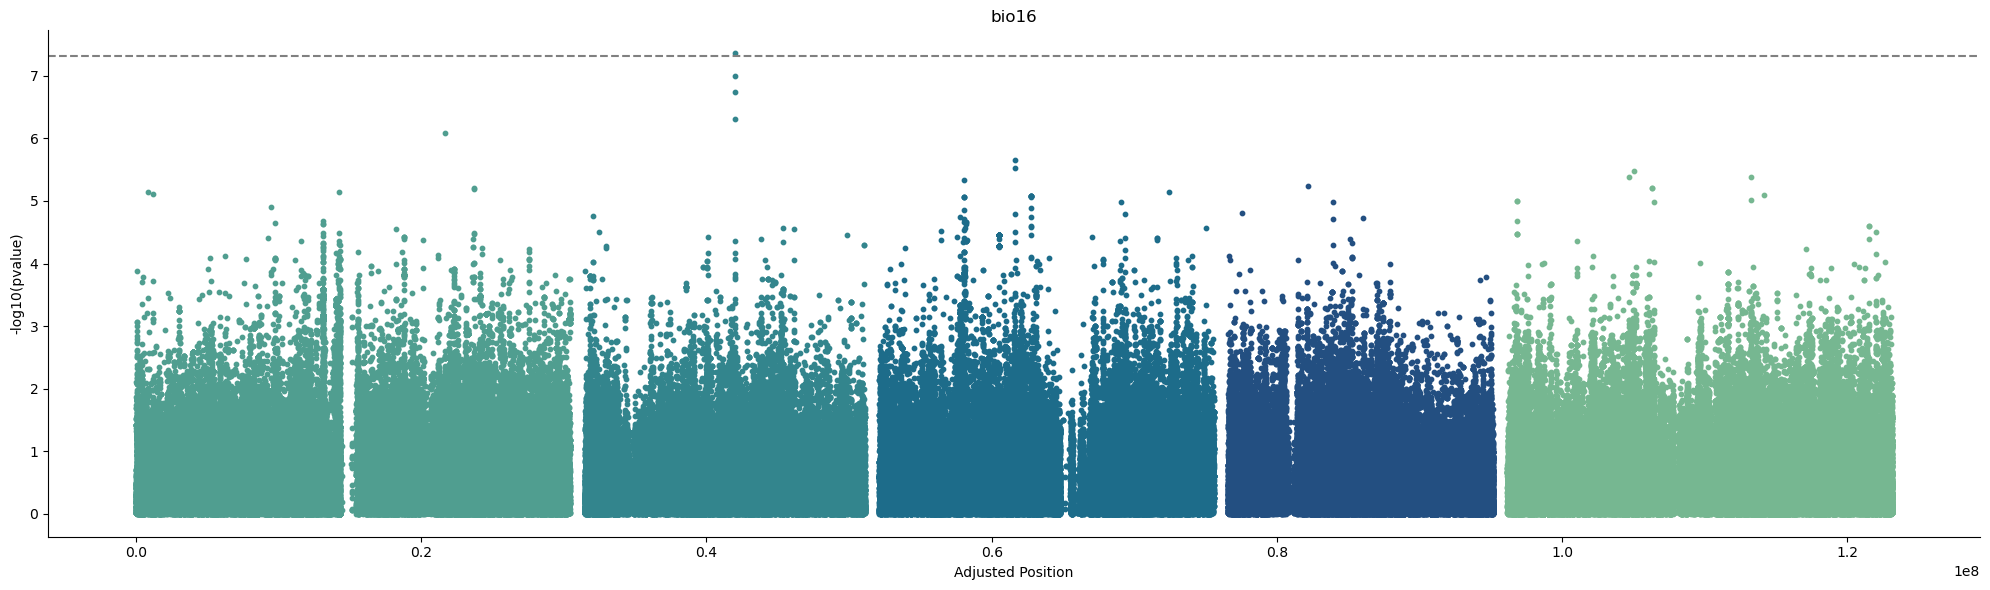

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


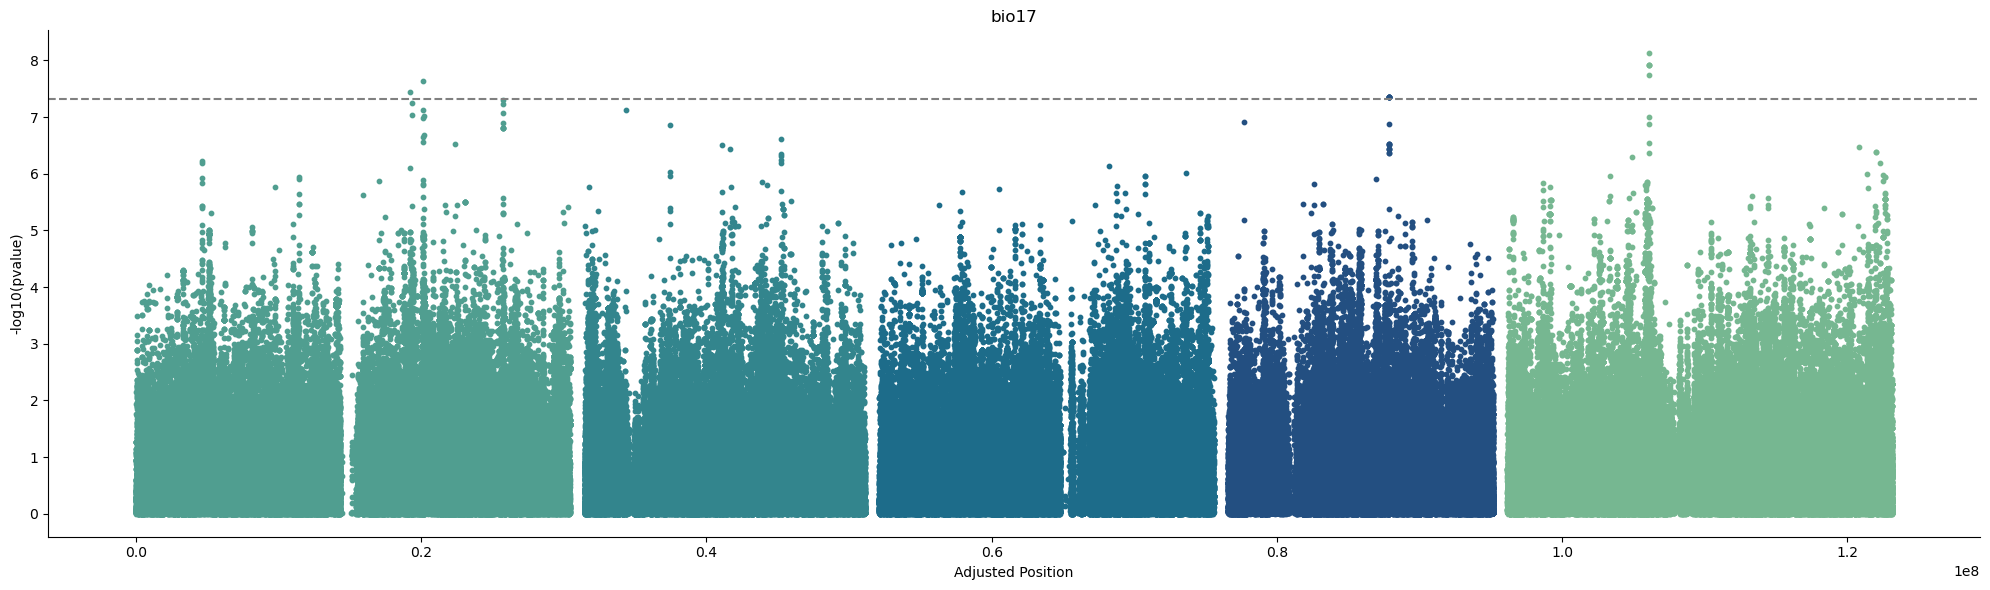

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


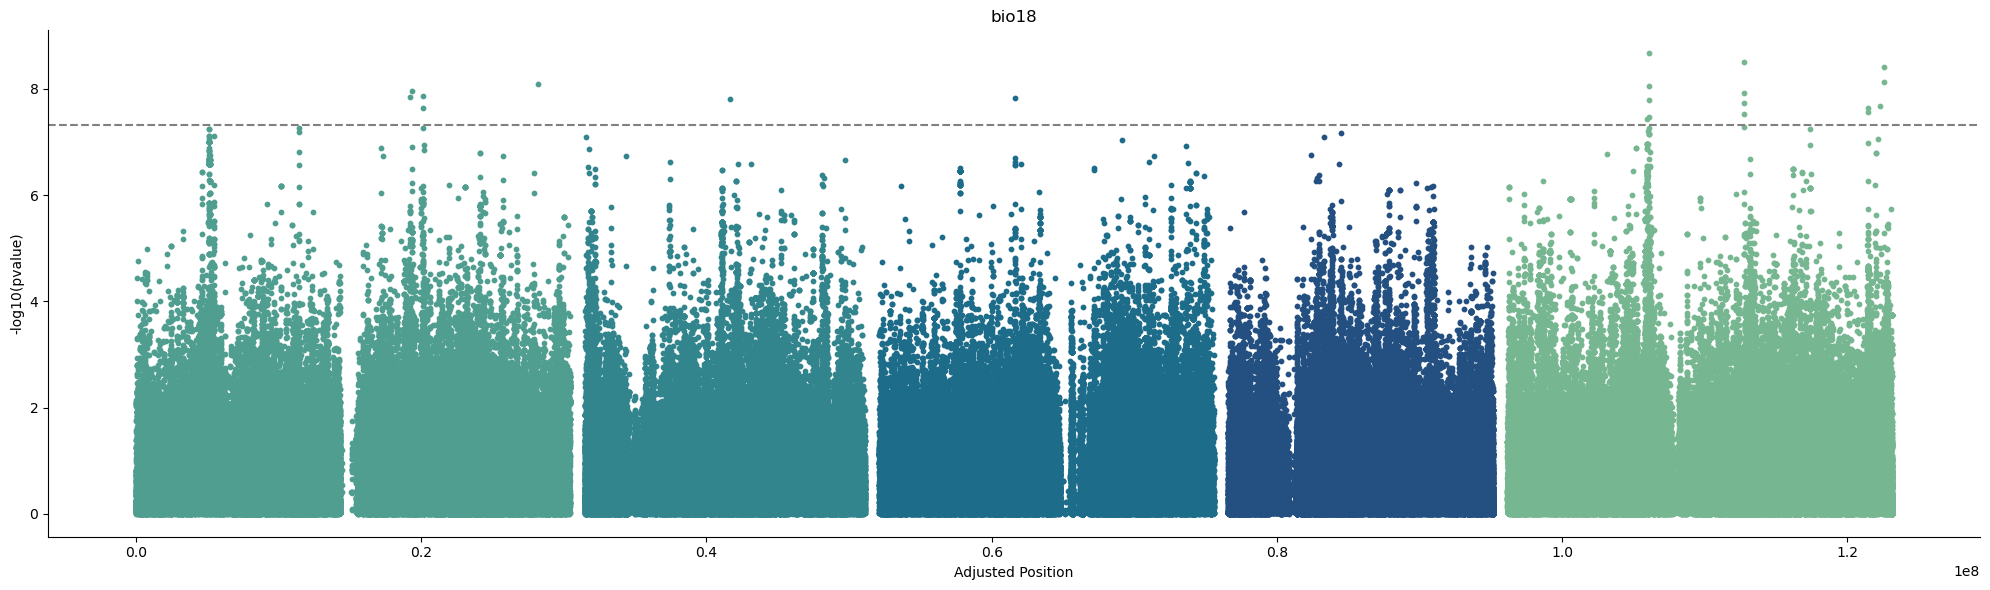

/tmp/ipykernel_1140301/659811563.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


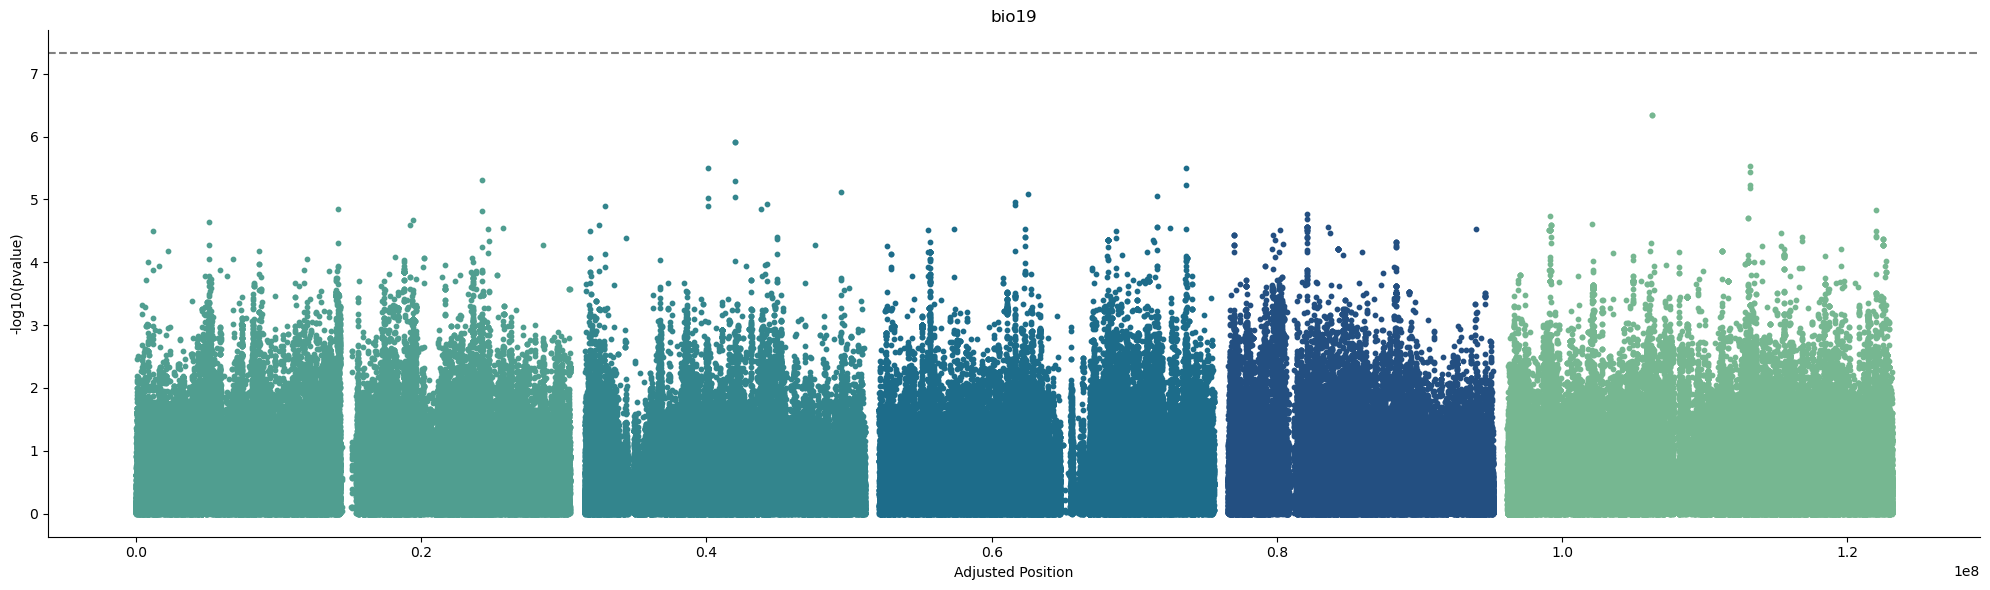

In [30]:
for biovar in biovars:

    #clump= pd.read_csv(f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/output/output_clumping_{biovar}.clumped', sep='\s+')
    pvalues_file = wd + f'lfmm_{biovar}_{kvalue}_results.csv'
    
    pvalues = pd.read_csv(pvalues_file)

    pvalues['chrom'] = pvalues['snp_id'].str.split('_').str[0].astype(int)
    pvalues['pos'] = pvalues['snp_id'].str.split('_').str[1].astype(int)
    
    pvalues.columns = ['id', 'pvalue', 'sign', 'block', 'chrom', 'pos']
    
    threshold_value = 0.05 / len(pvalues)
    
    #sm.qqplot(pvalues['pvalue'], line ='45') 
    #py.show() 
    
    df = pvalues.copy()
    
    colors = sns.color_palette("crest", n_colors = 5)
    
    # Parsing chromosome number and position
    df['chromosome'] = df['chrom']
    df['position'] = df['pos']
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])
    
    # Calculate the offset for each chromosome to prevent overlap
    chromosome_offsets = {}
    offset = 0
    for chrom in sorted(df['chromosome'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = df[df['chromosome'] == chrom]['position'].max()
        offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes
    
    # Apply offsets to positions
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Creating the Manhattan plot
    plt.figure(figsize=(20, 6))
    
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)
    


    # Highlight clumped SNPs
    #clumped_subset = df[df['id'].isin(clump['SNP'])]
    #plt.scatter(clumped_subset['adjusted_position'], clumped_subset['-log10(pvalue)'], s=50, facecolors='none', edgecolors='grey', linewidths=2, label='Clumped SNPs')
    
    # Aesthetics
    plt.xlabel('Adjusted Position')
    plt.ylabel('-log10(pvalue)')
    #plt.title('Manhattan Plot')
    #plt.grid(axis='y')
    #plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)  # Remove the top spine
    ax.spines['right'].set_visible(False)
    # Threshold line (optional)
    threshold = -np.log10(threshold_value)
    plt.axhline(y=threshold, color='grey', linestyle='dashed')
    plt.title(f'{biovar}')  # Set the title

    # Show the plot
    plt.tight_layout()
    plt.savefig(wd + f'manhattan_{biovar}.png')
    plt.show()

In [13]:
    # Add circles around the specific genes
    for gene in to_mark:
        print(gene)
        subset_gene = df[(df['block'] == gene)]
        if not subset_gene.empty:
            adjusted_pos = subset_gene['adjusted_position'].values[0]
            plt.axvline(x=adjusted_pos, color='red', linestyle='--', linewidth=1, label=f'Gene {gene}')

        

id        pvalue   sign   block  chrom       pos  chromosome  \
0             1_346  7.657514e-01  False     1_0      1       346           1   
1             1_353  2.399266e-02  False     1_0      1       353           1   
2             1_363  6.970041e-01  False     1_0      1       363           1   
3             1_395  7.417576e-01  False     1_0      1       395           1   
4             1_396  7.417576e-01  False     1_0      1       396           1   
...             ...           ...    ...     ...    ...       ...         ...   
1054569  5_26975078  3.863299e-02  False  5_3110      5  26975078           5   
1054570  5_26975121  2.719072e-01  False  5_3110      5  26975121           5   
1054571  5_26975148  2.719072e-01  False  5_3110      5  26975148           5   
1054572  5_26975272  8.939716e-01  False  5_3110      5  26975272           5   
1054573  5_26975288  7.502914e-07  False  5_3110      5  26975288           5   

         position  -log10(pvalue)  adjusted_position  
0             346        0.115912                346  
1             353        1.619922                353  
2             363        0.156765                363  
3             395        0.129738                395  
4             396        0.129738                396  
...           ...             ...                ...  
1054569  26975078        1.413042          123134832  
1054570  26975121        0.565579          123134875  
1054571  26975148        0.565579          123134902  
1054572  26975272        0.048676          123135026  
1054573  26975288        6.124770          123135042  

[1054574 rows x 10 columns]